<center><h1> Analysis and Correlation of Reported Insomnia with Nutritional Intake Patterns in Adolescents and Adults Using NHANES 2017-2020 Data


<center><h2> Caitlyn Chow

<h2> I. Data Preperation

In [52]:
pip install pandas pyreadstat

Note: you may need to restart the kernel to use updated packages.


In [53]:
import pandas as pd
import pyreadstat

# Load datasets into pandas DataFrames
df_individual_foods_day1, meta = pyreadstat.read_xport('P_DR1IFF.XPT')
df_individual_foods_day2, meta = pyreadstat.read_xport('P_DR2IFF.XPT')
df_total_nutrient_day1, meta = pyreadstat.read_xport('P_DR1TOT.XPT')
df_total_nutrient_day2, meta = pyreadstat.read_xport('P_DR2TOT.XPT')
df_sleep_disorders, meta = pyreadstat.read_xport('P_SLQ.XPT')
df_alcohol_use, meta = pyreadstat.read_xport('P_ALQ.XPT')
df_demographics, meta = pyreadstat.read_xport('P_DEMO.XPT')
df_diabetes, meta = pyreadstat.read_xport('P_DIQ.XPT')
df_bp_cholesterol, meta = pyreadstat.read_xport('P_BPQ.XPT')
df_cardiovascular_health, meta = pyreadstat.read_xport('P_CDQ.XPT')

In [54]:
# Define columns to keep from each DataFrame based on actual column names
columns_to_keep = {
    'df_individual_foods_day1': ['SEQN', 'DR1IKCAL', 'DR1ICARB', 'DR1IPROT', 'DR1ITFAT', 'DR1ISFAT', 'DR1IMFAT', 'DR1IPFAT', 'DR1IVARA', 'DR1IVC', 'DR1IVD', 'DR1ICALC', 'DR1IIRON', 'DR1IMAGN', 'DR1IZINC', 'DR1ISODI', 'DR1IPOTA', 'DR1_020', 'DR1_030Z', 'DR1_040Z'],
    'df_individual_foods_day2': ['SEQN', 'DR2IKCAL', 'DR2ICARB', 'DR2IPROT', 'DR2ITFAT', 'DR2ISFAT', 'DR2IMFAT', 'DR2IPFAT', 'DR2IVARA', 'DR2IVC', 'DR2IVD', 'DR2ICALC', 'DR2IIRON', 'DR2IMAGN', 'DR2IZINC', 'DR2ISODI', 'DR2IPOTA', 'DR2_020', 'DR2_030Z', 'DR2_040Z'],
    'df_sleep_disorders': ['SEQN', 'SLQ050'],
    'df_alcohol_use': ['SEQN', 'ALQ121'],
    'df_demographics': ['SEQN', 'RIDAGEYR'],
    'df_diabetes': ['SEQN', 'DIQ010'],
    'df_bp_cholesterol': ['SEQN', 'BPQ080'],
    'df_cardiovascular_health': ['SEQN', 'CDQ001', 'CDQ002', 'CDQ003', 'CDQ004', 'CDQ005', 'CDQ006', 'CDQ009D', 'CDQ009E', 'CDQ009F', 'CDQ009G']
}

In [55]:
# Filter columns
df_individual_foods_day1 = df_individual_foods_day1[columns_to_keep['df_individual_foods_day1']]
df_individual_foods_day2 = df_individual_foods_day2[columns_to_keep['df_individual_foods_day2']]
df_sleep_disorders = df_sleep_disorders[columns_to_keep['df_sleep_disorders']]
df_alcohol_use = df_alcohol_use[columns_to_keep['df_alcohol_use']]
df_demographics = df_demographics[columns_to_keep['df_demographics']]
df_diabetes = df_diabetes[columns_to_keep['df_diabetes']]
df_bp_cholesterol = df_bp_cholesterol[columns_to_keep['df_bp_cholesterol']]
df_cardiovascular_health = df_cardiovascular_health[columns_to_keep['df_cardiovascular_health']]

In [56]:
# Merge datasets on SEQN before excluding rows
dfs_to_merge = [df_individual_foods_day1, df_individual_foods_day2, df_sleep_disorders, df_alcohol_use, df_diabetes, df_bp_cholesterol, df_cardiovascular_health]

df = df_demographics
for data in dfs_to_merge:
    df = pd.merge(df, data, on='SEQN', how='left')


In [57]:
# Apply exclusion criteria
df = df[(df['RIDAGEYR'] >= 13) & (df['RIDAGEYR'] <= 60)]
df = df[df['DIQ010'] != 1]
df = df[df['BPQ080'] != 1]
df = df[~((df['CDQ001'] == 1) & (df['CDQ002'] == 1) & (df['CDQ003'] == 1) & (df['CDQ004'] == 1) & (df['CDQ005'] == 1) & (df['CDQ006'] == 1) & ((df['CDQ009D'] == 4) | (df['CDQ009E'] == 5) | ((df['CDQ009F'] == 6) & (df['CDQ009G'] == 7))))]

# Drop unnecessary columns
columns_to_drop = ['DIQ010', 'BPQ080', 'CDQ001', 'CDQ002', 'CDQ003', 'CDQ004', 'CDQ005', 'CDQ006', 'CDQ009D', 'CDQ009E', 'CDQ009F', 'CDQ009G']
df.drop(columns=columns_to_drop, inplace=True)

In [58]:
# Drop rows with any NaN values
df = df.dropna()

In [59]:
# Compute average nutritional intake
df['Avg_Energy'] = df[['DR1IKCAL', 'DR2IKCAL']].mean(axis=1)
df['Avg_Carbohydrates'] = df[['DR1ICARB', 'DR2ICARB']].mean(axis=1)
df['Avg_Proteins'] = df[['DR1IPROT', 'DR2IPROT']].mean(axis=1)
df['Avg_Total_Fat'] = df[['DR1ITFAT', 'DR2ITFAT']].mean(axis=1)
df['Avg_Saturated_Fat'] = df[['DR1ISFAT', 'DR2ISFAT']].mean(axis=1)
df['Avg_Monounsaturated_Fat'] = df[['DR1IMFAT', 'DR2IMFAT']].mean(axis=1)
df['Avg_Polyunsaturated_Fat'] = df[['DR1IPFAT', 'DR2IPFAT']].mean(axis=1)
df['Avg_Vitamin_A'] = df[['DR1IVARA', 'DR2IVARA']].mean(axis=1)
df['Avg_Vitamin_C'] = df[['DR1IVC', 'DR2IVC']].mean(axis=1)
df['Avg_Vitamin_D'] = df[['DR1IVD', 'DR2IVD']].mean(axis=1)
df['Avg_Calcium'] = df[['DR1ICALC', 'DR2ICALC']].mean(axis=1)
df['Avg_Iron'] = df[['DR1IIRON', 'DR2IIRON']].mean(axis=1)
df['Avg_Magnesium'] = df[['DR1IMAGN', 'DR2IMAGN']].mean(axis=1)
df['Avg_Zinc'] = df[['DR1IZINC', 'DR2IZINC']].mean(axis=1)
df['Avg_Sodium'] = df[['DR1ISODI', 'DR2ISODI']].mean(axis=1)
df['Avg_Potassium'] = df[['DR1IPOTA', 'DR2IPOTA']].mean(axis=1)

In [60]:
# Convert columns to float
df['DR1_020'] = df['DR1_020'].astype(float)
df['DR2_020'] = df['DR2_020'].astype(float)


In [61]:
# Helper function to fix the HHMM6.0 format
def fix_hhmm6_format(hhmm6_float):
    hhmm6_int = int(hhmm6_float)  # Convert to integer
    
    hours = hhmm6_int // 10000  # Extract hours
    minutes = (hhmm6_int % 10000) // 100  # Extract minutes

    # Adjust minutes to be within 0-59
    while minutes >= 60:
        hours += 1
        minutes -= 60

    # Adjust hours to be within 0-23
    hours = hours % 24

    # Combine into HHMM format
    hhmm = hours * 100 + minutes
    return hhmm

# Apply the function to the DataFrame
df['DR1_020'] = df['DR1_020'].apply(lambda x: fix_hhmm6_format(x) if not pd.isnull(x) else None)
df['DR2_020'] = df['DR2_020'].apply(lambda x: fix_hhmm6_format(x) if not pd.isnull(x) else None)

In [62]:
# Function to convert HHMM to total minutes
def hhmm_to_minutes(hhmm):
    hours = hhmm // 100
    minutes = hhmm % 100
    return hours * 60 + minutes

In [63]:
# Match DR1_030Z and DR2_030Z values with DR1_020 and DR2_020 for breakfast, lunch, and dinner
df['Breakfast_Time_Minutes'] = df.apply(lambda row: hhmm_to_minutes(row['DR1_020']) if row['DR1_030Z'] == 1 else (hhmm_to_minutes(row['DR2_020']) if row['DR2_030Z'] == 1 else None), axis=1)
df['Lunch_Time_Minutes'] = df.apply(lambda row: hhmm_to_minutes(row['DR1_020']) if row['DR1_030Z'] == 2 else (hhmm_to_minutes(row['DR2_020']) if row['DR2_030Z'] == 2 else None), axis=1)
df['Dinner_Time_Minutes'] = df.apply(lambda row: hhmm_to_minutes(row['DR1_020']) if row['DR1_030Z'] == 3 else (hhmm_to_minutes(row['DR2_020']) if row['DR2_030Z'] == 3 else None), axis=1)

# Fill NaN values with the median time for the respective meal !!??????
df['Breakfast_Time_Minutes'].fillna(df['Breakfast_Time_Minutes'].median(), inplace=True)
df['Lunch_Time_Minutes'].fillna(df['Lunch_Time_Minutes'].median(), inplace=True)
df['Dinner_Time_Minutes'].fillna(df['Dinner_Time_Minutes'].median(), inplace=True)

# Take the average of chosen DR1_020 and DR2_020 values
df['Avg_Breakfast_Time_Minutes'] = df[['Breakfast_Time_Minutes']].mean(axis=1)
df['Avg_Lunch_Time_Minutes'] = df[['Lunch_Time_Minutes']].mean(axis=1)
df['Avg_Dinner_Time_Minutes'] = df[['Dinner_Time_Minutes']].mean(axis=1)

In [64]:
df['Short_Term_Intake_Change'] = abs(df['DR1IKCAL'] - df['DR2IKCAL'])

In [65]:
# Calculate consistency for breakfast, lunch, and dinner
df['Breakfast_Consistency'] = df.apply(lambda row: abs(row['DR1_020'] - row['DR2_020']) if row['DR1_030Z'] == 1 and row['DR2_030Z'] == 1 else None, axis=1)
df['Lunch_Consistency'] = df.apply(lambda row: abs(row['DR1_020'] - row['DR2_020']) if row['DR1_030Z'] == 2 and row['DR2_030Z'] == 2 else None, axis=1)
df['Dinner_Consistency'] = df.apply(lambda row: abs(row['DR1_020'] - row['DR2_020']) if row['DR1_030Z'] == 3 and row['DR2_030Z'] == 3 else None, axis=1)

# Fill NaN values with the median of the respective differences
df['Breakfast_Consistency'].fillna(df['Breakfast_Consistency'].median(), inplace=True)
df['Lunch_Consistency'].fillna(df['Lunch_Consistency'].median(), inplace=True)
df['Dinner_Consistency'].fillna(df['Dinner_Consistency'].median(), inplace=True)

In [66]:
# Define a function to calculate meal skipping
def meal_skipping(row, meal_code):
    skip_count = 0
    if not (row['DR1_030Z'] == meal_code and not pd.isnull(row['DR1_020'])):
        skip_count += 1
    if not (row['DR2_030Z'] == meal_code and not pd.isnull(row['DR2_020'])):
        skip_count += 1
    return skip_count

# Calculate skipping behavior for breakfast, lunch, and dinner
df['Breakfast_Skipping'] = df.apply(lambda row: meal_skipping(row, 1), axis=1)
df['Lunch_Skipping'] = df.apply(lambda row: meal_skipping(row, 2), axis=1)
df['Dinner_Skipping'] = df.apply(lambda row: meal_skipping(row, 3), axis=1)

In [67]:
# List of required variables
variables_needed = [
    'Dinner_Skipping', 'Lunch_Skipping', 'Breakfast_Skipping',
    'Dinner_Consistency', 'Lunch_Consistency', 'Breakfast_Consistency',
    'SLQ050', 'Avg_Energy', 'Avg_Carbohydrates', 'Avg_Proteins', 'Avg_Total_Fat',
    'Avg_Saturated_Fat', 'Avg_Monounsaturated_Fat', 'Avg_Polyunsaturated_Fat',
    'Avg_Vitamin_A', 'Avg_Vitamin_C', 'Avg_Vitamin_D', 'Avg_Calcium', 'Avg_Iron',
    'Avg_Magnesium', 'Avg_Zinc', 'Avg_Sodium', 'Avg_Potassium',
    'Avg_Breakfast_Time_Minutes', 'Avg_Lunch_Time_Minutes', 'Avg_Dinner_Time_Minutes',
    'Short_Term_Intake_Change', 'ALQ121'
]

# Create a copy of the DataFrame with only the required variables
df_selected = df[variables_needed].copy()

In [68]:
for var in variables_needed:
    df_selected[var] = df_selected[var].astype(int)

In [69]:
df_selected=df_selected.drop_duplicates(keep='first')

In [70]:
# Rename the columns
df_selected.rename(columns={
    'ALQ121': 'Low_Frequency_Of_Drinking_Alcohol',
    'Short_Term_Intake_Change': 'Short_Term_Nutrient_Intake_Change',
    'SLQ050': 'Insomnia_Presence'
}, inplace=True)

In [71]:
# Filter out rows where 'Insomnia_Presence' is 7, 9, or missing
df_selected = df_selected[~df_selected['Insomnia_Presence'].isin([7, 9, '.'])]

# Convert 'Insomnia_Presence' to numeric, handling potential conversion issues
df_selected['Insomnia_Presence'] = pd.to_numeric(df_selected['Insomnia_Presence'], errors='coerce')

# Map values: 1 to 1 (Yes) and 2 to 0 (No)
df_selected['Insomnia_Presence'] = df_selected['Insomnia_Presence'].map({1: 1, 2: 0})

# Verify the changes
print(df_selected['Insomnia_Presence'].value_counts())

0    450161
1    140461
Name: Insomnia_Presence, dtype: int64


<h2> II. Exploratory Data Analysis

In [72]:
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

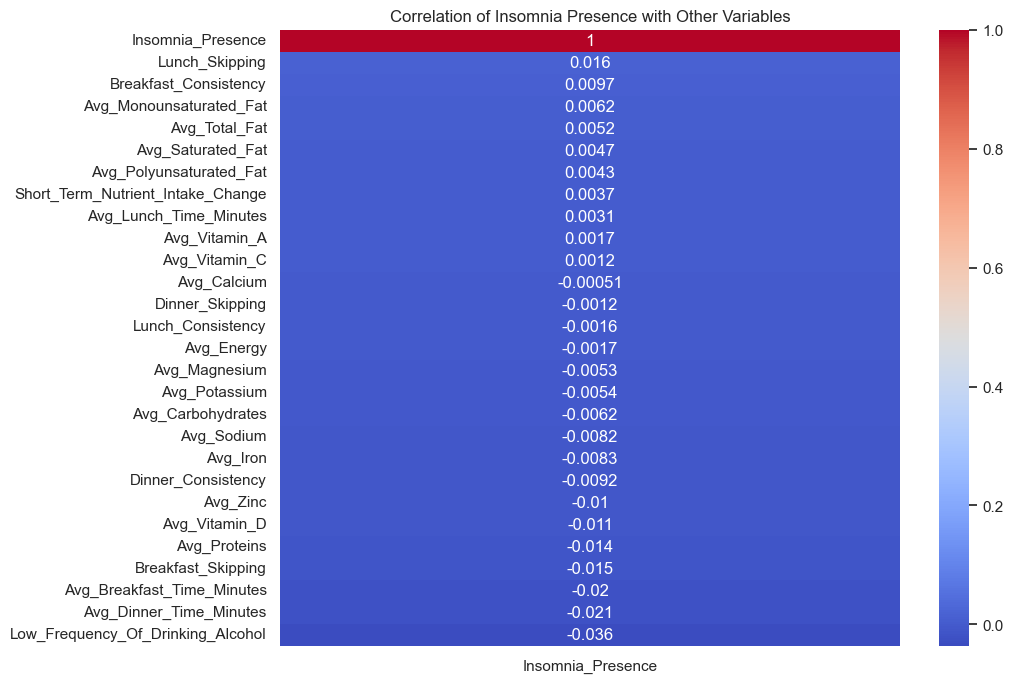

In [73]:
# Calculate the correlation matrix
correlation_matrix = df_selected.corr()

# Focus on the 'Insomnia_Presence' column correlation
insomnia_presence_corr = correlation_matrix[['Insomnia_Presence']].sort_values(by='Insomnia_Presence', ascending=False)

# Plot the heatmap for 'Insomnia_Presence' correlation
plt.figure(figsize=(10, 8))
sns.set(font_scale=1)
sns.heatmap(insomnia_presence_corr, annot=True, cmap='coolwarm', cbar=True)

plt.title('Correlation of Insomnia Presence with Other Variables')
plt.show()

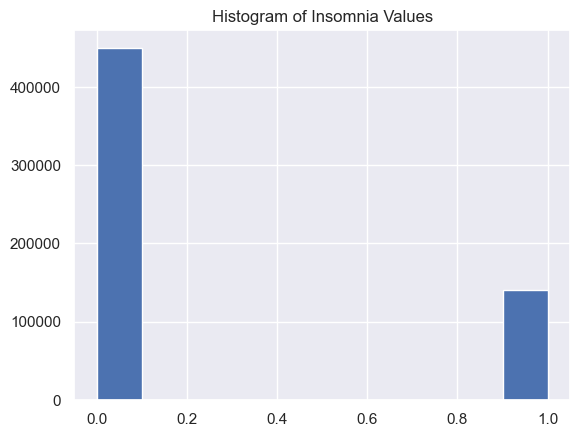

In [23]:
plt.hist(df_selected['Insomnia_Presence']);
plt.title('Histogram of Insomnia Values');

In [24]:
#Treat outliers in a dataframe using the flooring and capping method based on the Interquartile Range (IQR).
#https://careerfoundry.com/en/blog/data-analytics/how-to-find-outliers/#:~:text=Using%20the%20IQR%2C%20the%20outlier,Q1%20(Q3%E2%80%93Q1).

def treat_outliers(df_selected, col):
    # Calculate the first (Q1) and third (Q3) quartiles of the column.
    Q1 = df_selected[col].quantile(0.25)
    Q3 = df_selected[col].quantile(0.75)
    
    # Compute the Interquartile Range (IQR) as the difference between Q3 and Q1.
    IQR = Q3 - Q1
    
    # Define the Lower Whisker as 1.5 times the IQR below Q1.
    Lower_Whisker = Q1 - 1.5 * IQR
    
    # Define the Upper Whisker as 1.5 times the IQR above Q3.
    Upper_Whisker = Q3 + 1.5 * IQR
    
    # Clip values outside the range defined by the Lower and Upper Whiskers. This replaces values below the Lower Whisker 
    # with the Lower Whisker value and values above the Upper Whisker with the Upper Whisker value.
    df_selected[col] = np.clip(df_selected[col], Lower_Whisker, Upper_Whisker)                                                            
    
    return df

In [25]:
df_selected.shape

(590622, 28)

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

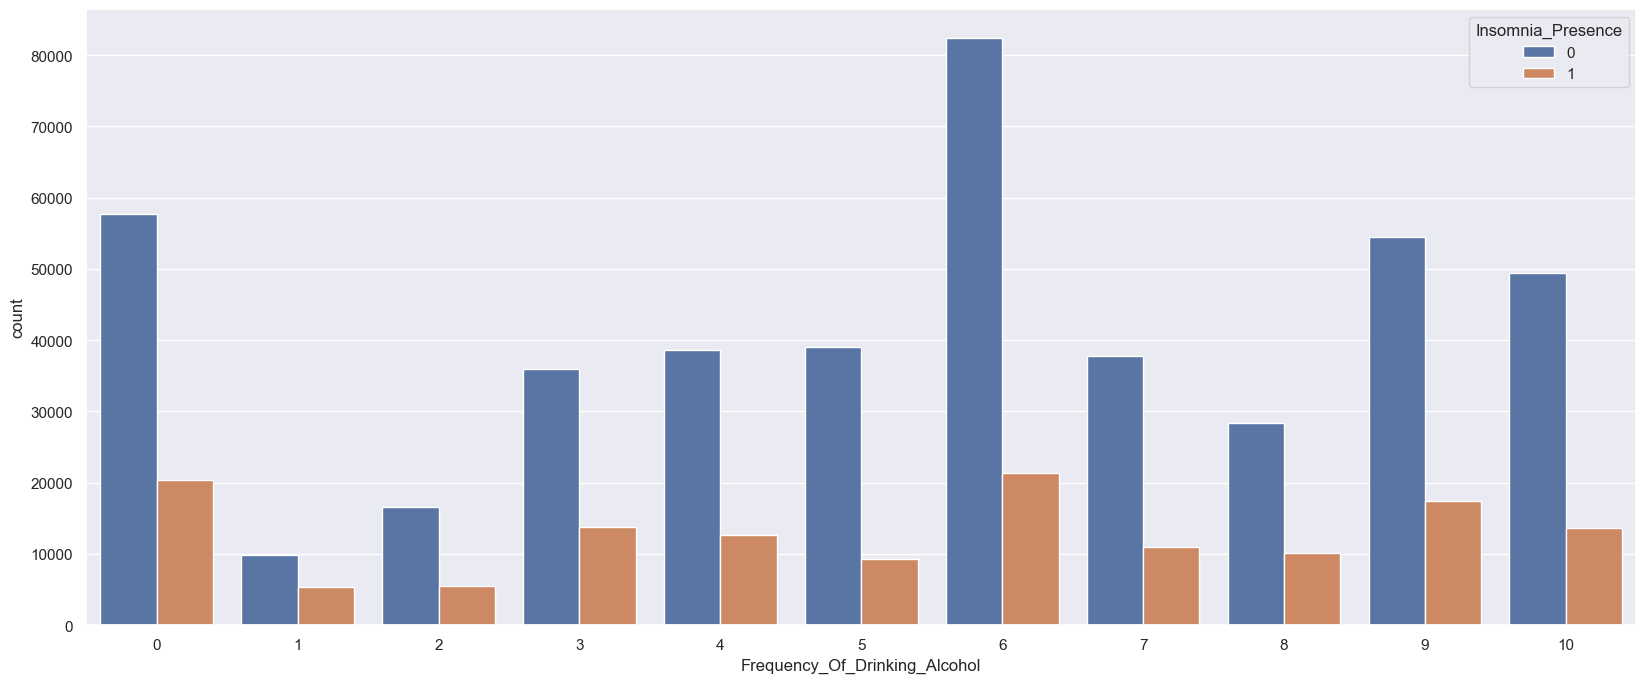

In [28]:
plt.figure(figsize=(20,8))
sns.countplot(data=df_selected, x='Frequency_Of_Drinking_Alcohol', hue='Insomnia_Presence');

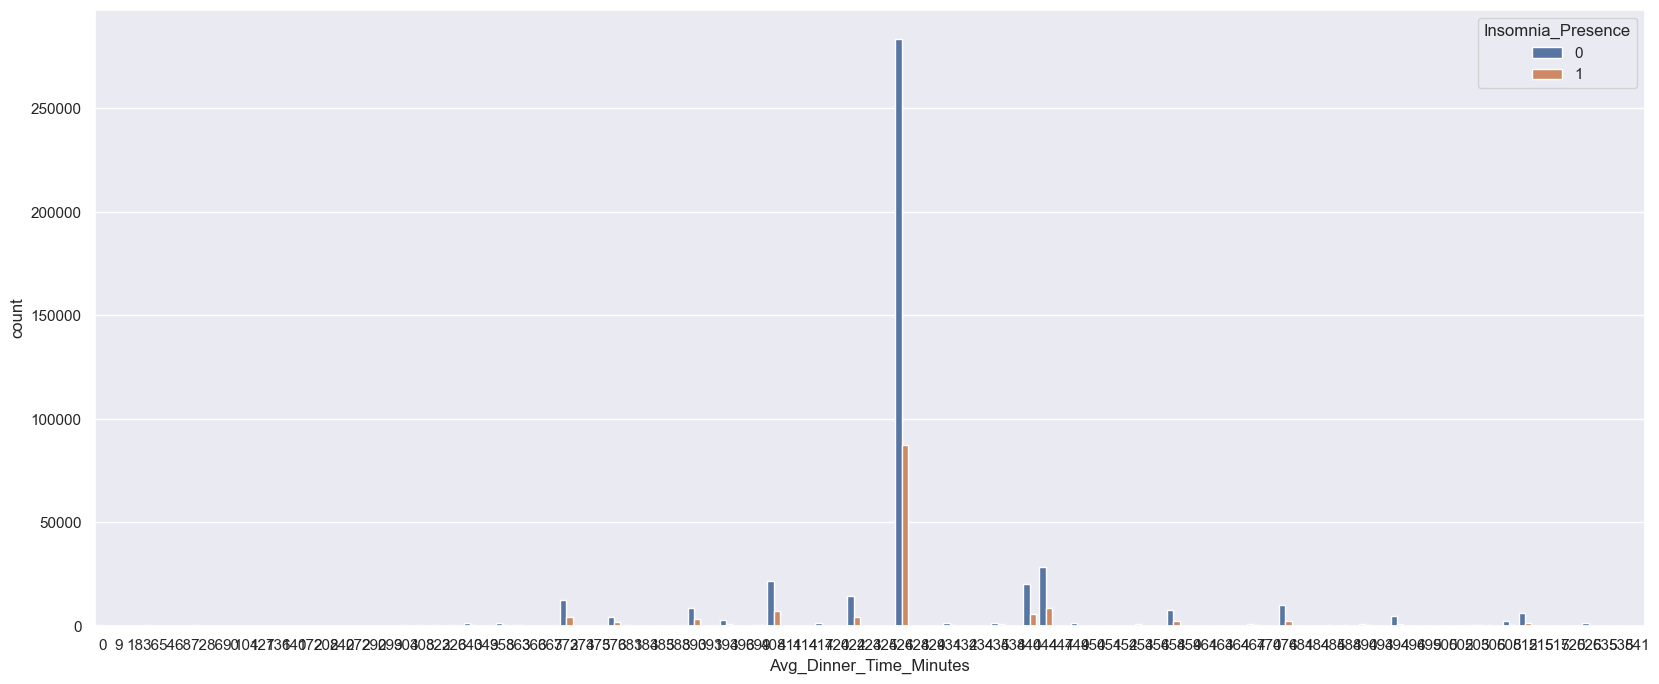

In [29]:
plt.figure(figsize=(20,8))
sns.countplot(data=df_selected, x='Avg_Dinner_Time_Minutes', hue='Insomnia_Presence');

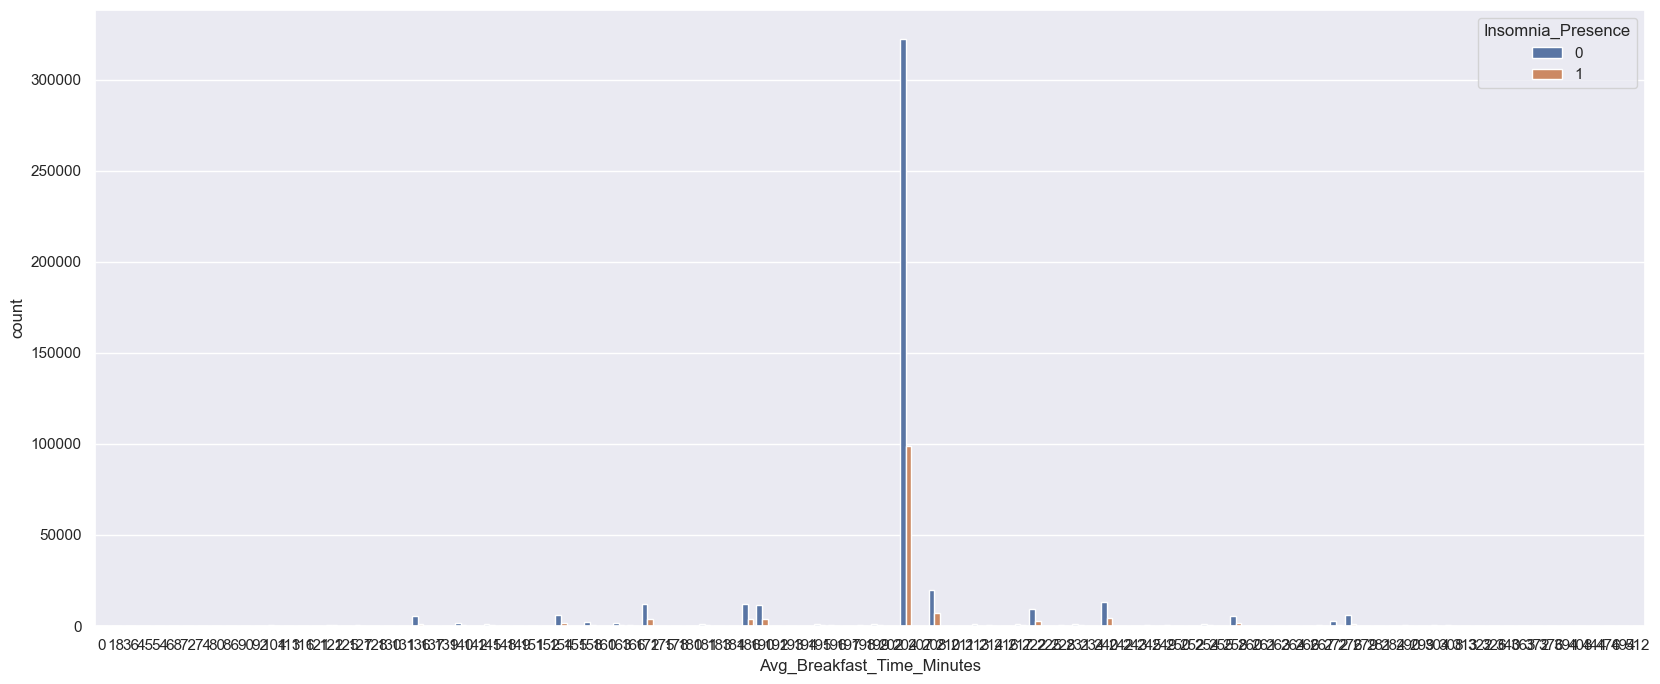

In [30]:
plt.figure(figsize=(20,8))
sns.countplot(data=df_selected, x='Avg_Breakfast_Time_Minutes', hue='Insomnia_Presence');

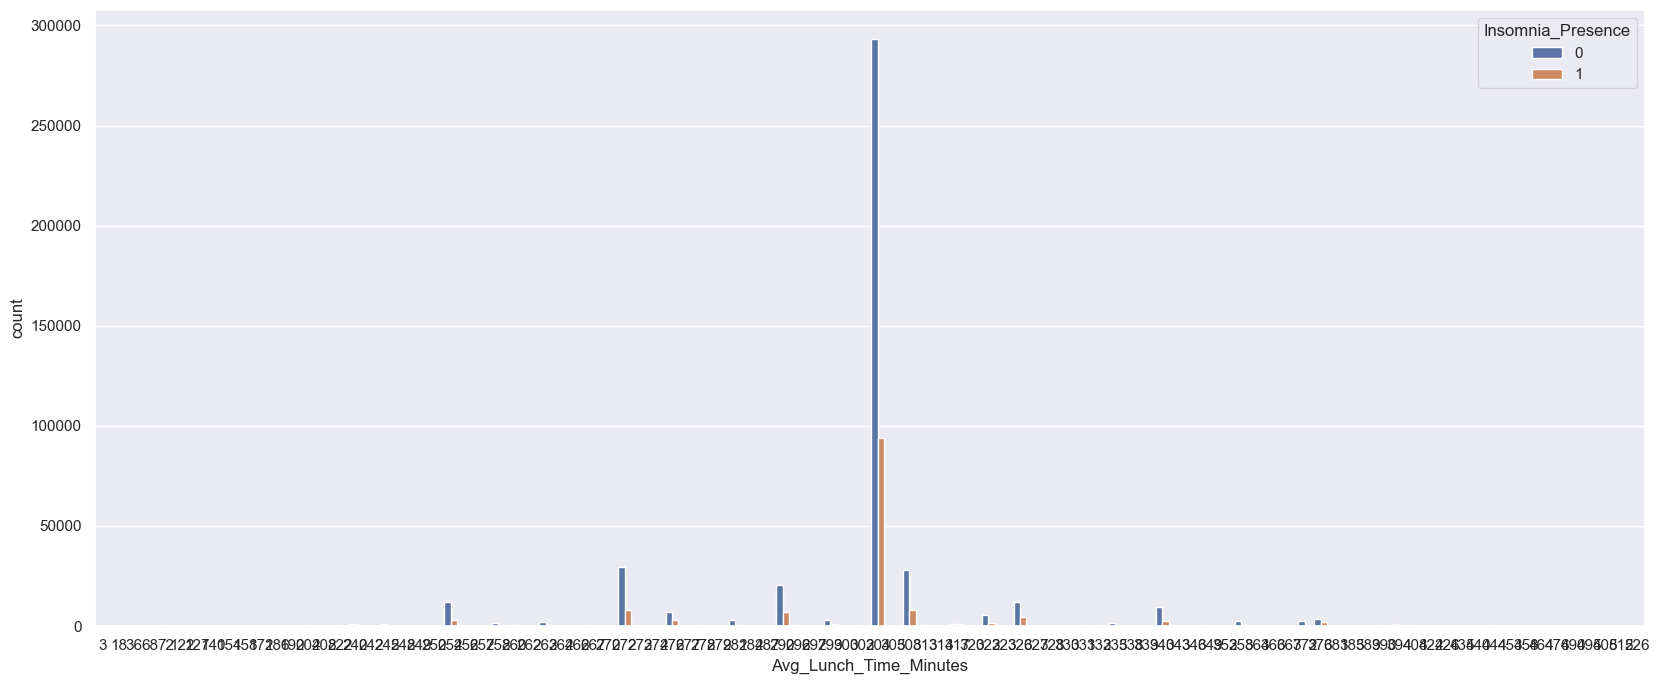

In [31]:
plt.figure(figsize=(20,8))
sns.countplot(data=df_selected, x='Avg_Lunch_Time_Minutes', hue='Insomnia_Presence');

In [34]:
df_selected['Insomnia_Presence'] = df_selected['Insomnia_Presence'].astype('category')

<h2>III. Decision Tree Modelling

In [35]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE

data = df_selected.copy() # Make copy of dataframe
X = data.drop('Insomnia_Presence',axis=1)    # Drop status from the X features, as it is the outcome
y = data['Insomnia_Presence'].astype('int64') #  Status it the target/outcome variable

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=1)

In [37]:
# Apply SMOTE to balance the training data
smote = SMOTE(random_state=1)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [38]:

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}



In [39]:
# Initialize the model
model = DecisionTreeClassifier(random_state=1)

In [40]:

# Apply GridSearchCV to find the best parameters
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='recall', cv=5, n_jobs=-1)
grid_search.fit(X_train_res, y_train_res)

# Best model from grid search
best_model = grid_search.best_estimator_

In [41]:
# Function to calculate recall score
def get_recall_score(model):
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print("Recall on training set : ", metrics.recall_score(y_train, pred_train))
    print("Recall on test set : ", metrics.recall_score(y_test, pred_test))

# Evaluate the best model
get_recall_score(best_model)

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)

Recall on training set :  0.9971445217253706
Recall on test set :  0.73006993006993
Best parameters found:  {'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


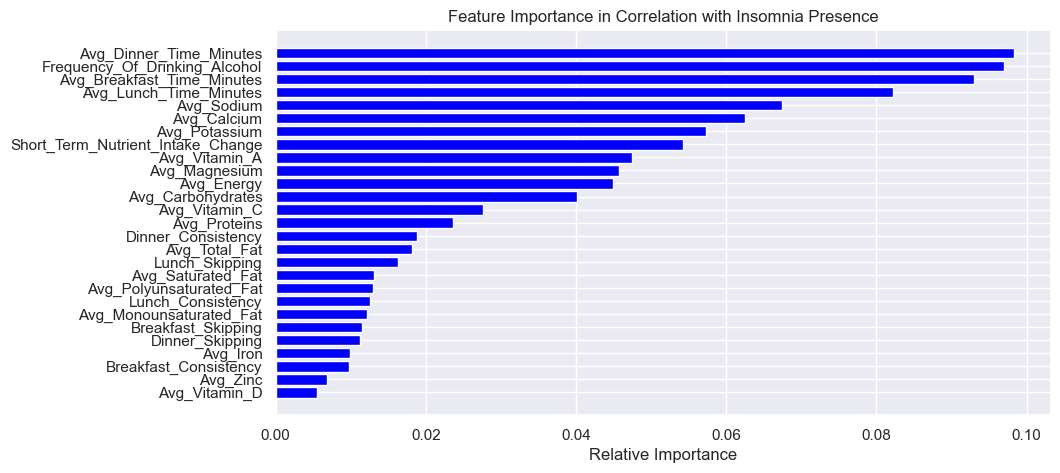

In [45]:
import numpy as np
# Plot feature importances
importances = best_model.feature_importances_
indices = np.argsort(importances)

# Get feature names
column_names = list(data.columns)
column_names.remove('Insomnia_Presence')  # Remove y from the model, this is the dependent variable.                 
feature_names = column_names

# Create a horizontal bar chart to visualize the feature importances
plt.figure(figsize=(10, 5))
plt.title('Feature Importance in Correlation with Insomnia Presence')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [44]:
from sklearn.metrics import accuracy_score, precision_score

# Function to calculate accuracy and precision
def evaluate_model_performance(model):
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    # Calculate recall
    recall_train = metrics.recall_score(y_train, pred_train)
    recall_test = metrics.recall_score(y_test, pred_test)
    
    # Calculate accuracy
    accuracy_train = accuracy_score(y_train, pred_train)
    accuracy_test = accuracy_score(y_test, pred_test)
    
    # Calculate precision
    precision_train = precision_score(y_train, pred_train)
    precision_test = precision_score(y_test, pred_test)
    
    # Print scores
    print("Recall on training set: ", recall_train)
    print("Recall on test set: ", recall_test)
    print("Accuracy on training set: ", accuracy_train)
    print("Accuracy on test set: ", accuracy_test)
    print("Precision on training set: ", precision_train)
    print("Precision on test set: ", precision_test)

# Evaluate the best model
evaluate_model_performance(best_model)

Recall on training set:  0.9971445217253706
Recall on test set:  0.73006993006993
Accuracy on training set:  0.9988695347305953
Accuracy on test set:  0.8280006771626883
Precision on training set:  0.9980993246843007
Precision on test set:  0.6236559139784946


In [47]:
import pandas as pd

# Assuming 'best_model' is the trained Decision Tree model and 'feature_names' contains the names of the features
importances = best_model.feature_importances_

# Create a DataFrame for the feature importances
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance (%)': importances * 100
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance (%)', ascending=False)

# Display the DataFrame
print(importance_df)


                              Feature  Importance (%)
24            Avg_Dinner_Time_Minutes        9.828472
26      Frequency_Of_Drinking_Alcohol        9.698764
22         Avg_Breakfast_Time_Minutes        9.295678
23             Avg_Lunch_Time_Minutes        8.217793
20                         Avg_Sodium        6.743967
16                        Avg_Calcium        6.244041
21                      Avg_Potassium        5.724550
25  Short_Term_Nutrient_Intake_Change        5.425378
13                      Avg_Vitamin_A        4.744908
18                      Avg_Magnesium        4.577455
6                          Avg_Energy        4.497241
7                   Avg_Carbohydrates        4.016529
14                      Avg_Vitamin_C        2.755191
8                        Avg_Proteins        2.366483
3                  Dinner_Consistency        1.879712
9                       Avg_Total_Fat        1.816280
1                      Lunch_Skipping        1.631392
10                  Avg_Satu